In [1]:
from os import listdir
from os.path import isfile, join
import subprocess
import matplotlib.pyplot as plt
import numpy as np
import os
import galsim
from astropy.io import fits as pf

#HST images
files = [f for f in listdir('../acs_mosaic_2.0') if isfile(join('../acs_mosaic_2.0', f))]
#Galsim catalog from 
galsim_file = '/Users/remy/Desktop/LSST_Project/GalSim/examples/data/COSMOS_23.5_training_sample/real_galaxy_catalog_23.5.fits'
galsim_cat = pf.open(galsim_file)[1].data


Galsim is a simulation software that allows to reproduce astronomical scenes of the deep sky. For this it uses analytical profiles, but also models of galaxies built from real images of the COSMOS fields. The good news is that all of our AGN images are from the COSMOS fields too!

Galsim uses a catalog of galaxies and allows user to draw images for these galaxies on a pixel grid, but also allows to draw their PSFs. Be sure to download the catalog here: [https://github.com/GalSim-developers/GalSim/wiki/RealGalaxy%20Data](https://github.com/GalSim-developers/GalSim/wiki/RealGalaxy%20Data)
and to install galsim.

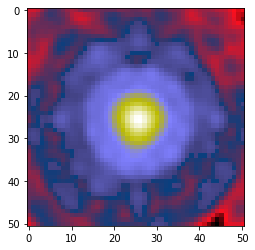

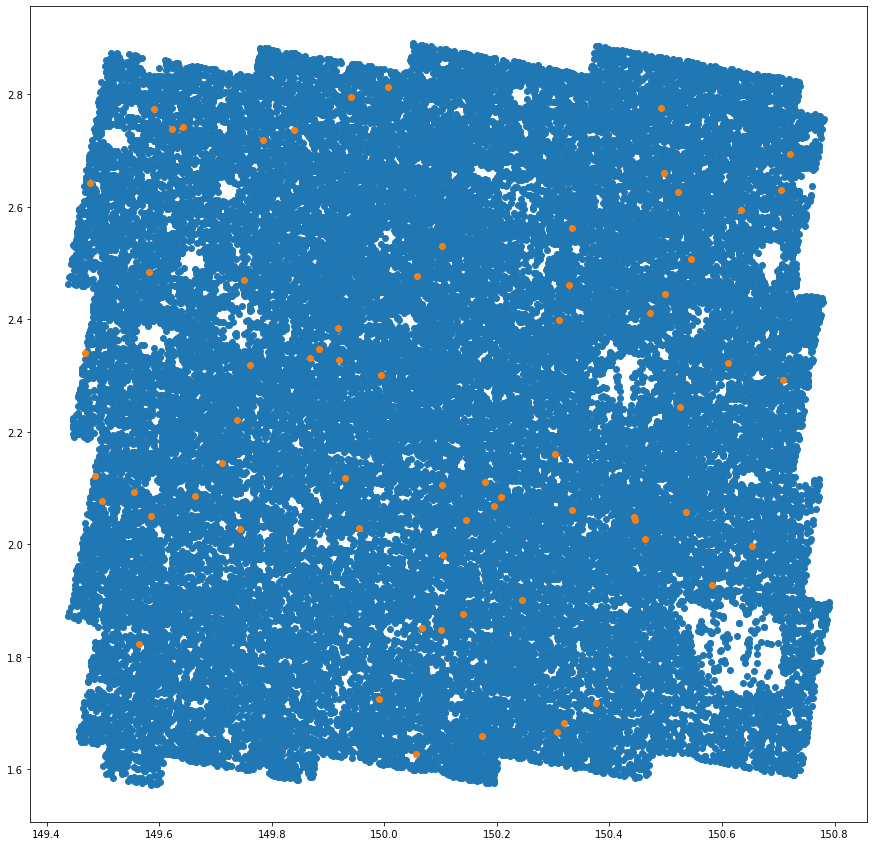

69


In [7]:
i=2 #Index of files start at 2
ras = []
decs = []
#Stores ra and dec coordinates of HST AGNs
for f in files:
    ra, dec = f.split('_')[1:3]
    if f.split('_')[-1] == 'sci.fits':
        #print(ra, dec)
        ras.append(np.float(ra))
        decs.append(np.float(dec))
        i+=1
        
#Coordinates of all the galaxies in the galsim COSMOS sample
gal_ra, gal_dec = [], []
for g in galsim_cat:
    ra, dec = g[1], g[2]
    gal_ra.append(ra)
    gal_dec.append(dec)
    
#How to extract the psf from a galsim galaxy (here, the first galaxy in the catalog)
gal_cat = galsim.RealGalaxyCatalog(file_name=galsim_file)    
psf = gal_cat.getPSF(0).drawImage(nx=51, ny=51, scale=0.03, method='real_space', use_true_center=True)
#Image of the PSF
plt.imshow(np.log10(psf.array), cmap = 'gist_stern')
plt.show()

#Positions of AGN and galsim sources
plt.figure(figsize = (15,15))
plt.plot(np.array(gal_ra), np.array(gal_dec), 'o')
plt.plot(np.array(ras), np.array(decs), 'o')
plt.show()
print(i-2)